## imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings
warnings.filterwarnings('ignore')

## reading the data

In [2]:
df = pd.read_csv('house_sales_prediction.csv').set_index('id', drop=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.a 

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.mode()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20140623T000000,350000.0,3.0,2.5,1300.0,5000.0,1.0,0.0,0.0,3.0,7.0,1300.0,0.0,2014.0,0.0,98103.0,47.5322,-122.29,1540.0,5000.0
1,NaN,450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.5491,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6624,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.6846,NaN,NaN,NaN


## 1.b

In [ ]:
skew = df.skew(axis = 0, skipna = True)
skew

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

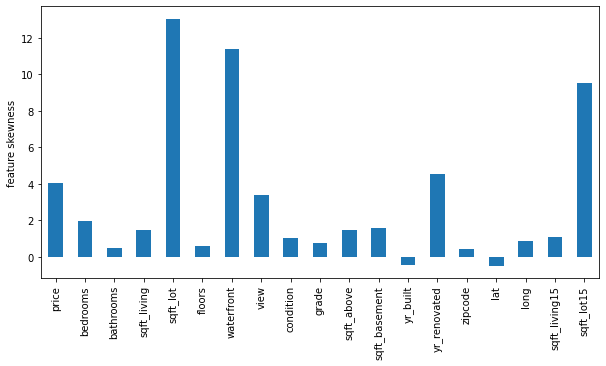

In [ ]:
skew.plot.bar(figsize=(10, 5), ylabel='feature skewness')

## 1.c

In [3]:
# check for missing values

for col in df.columns:
    miss = df[col].isnull().sum()
    if miss > 0:
        print("{}   => has {} missing value(s)".format(col, miss))
    else:
        print("{}   => has NO missing value!".format(col))

date   => has NO missing value!
price   => has NO missing value!
bedrooms   => has NO missing value!
bathrooms   => has NO missing value!
sqft_living   => has NO missing value!
sqft_lot   => has NO missing value!
floors   => has NO missing value!
waterfront   => has NO missing value!
view   => has NO missing value!
condition   => has NO missing value!
grade   => has NO missing value!
sqft_above   => has NO missing value!
sqft_basement   => has NO missing value!
yr_built   => has NO missing value!
yr_renovated   => has NO missing value!
zipcode   => has NO missing value!
lat   => has NO missing value!
long   => has NO missing value!
sqft_living15   => has NO missing value!
sqft_lot15   => has NO missing value!


## 1.d

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d08a3990>,
      dtype=object)

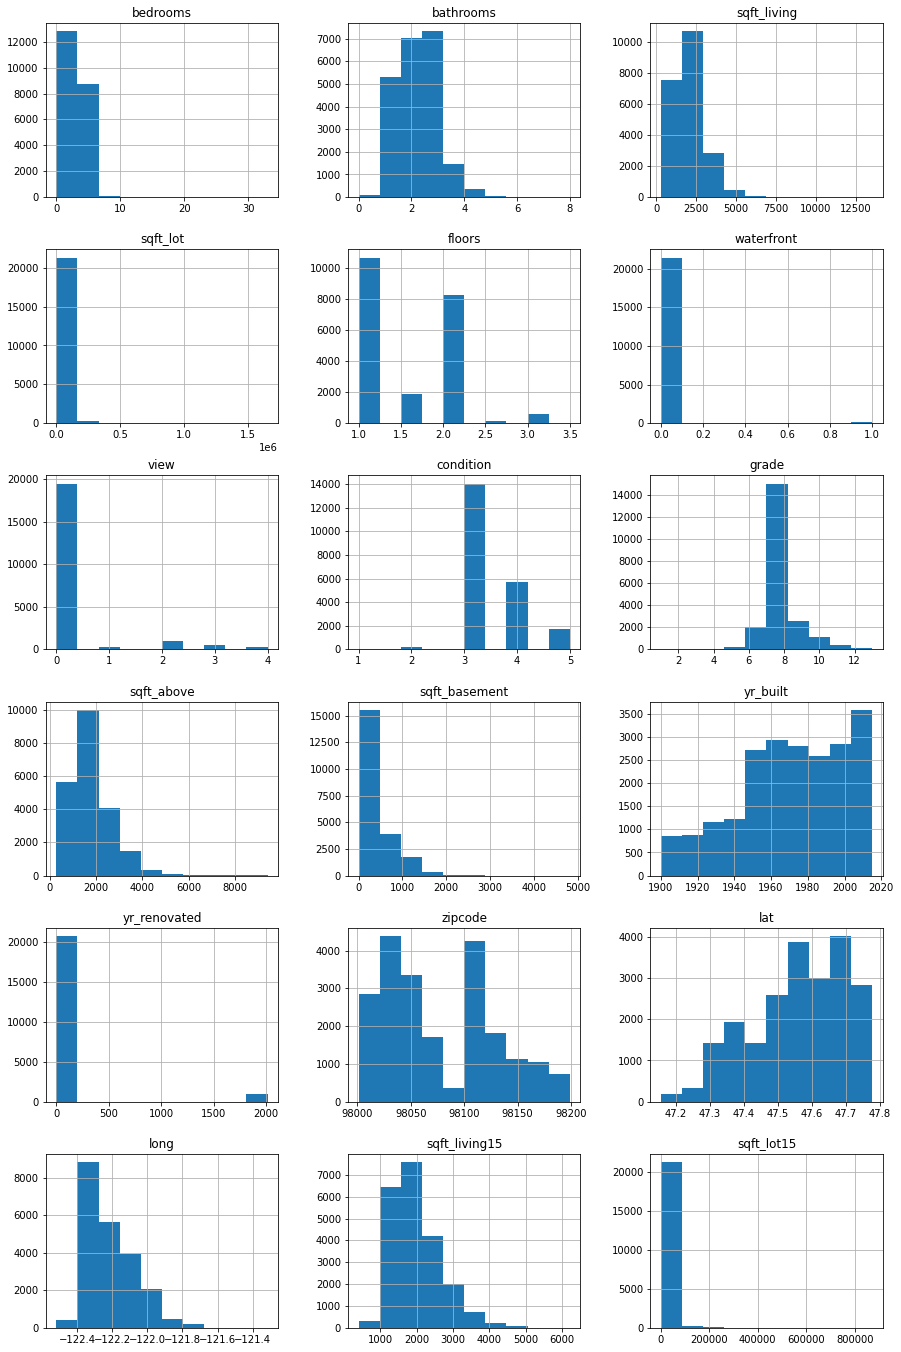

In [ ]:
fig, ax = plt.subplots(6, 3, figsize=(15, 24))
df.hist(column=df.columns[2:], ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d0821d90>]],
      dtype=object)

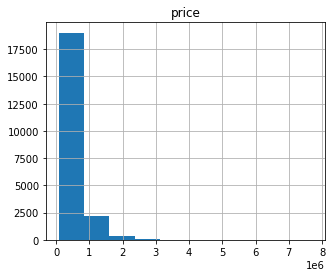

In [ ]:
df.hist(column=df.columns[1], figsize=(5, 4))

## 1.e

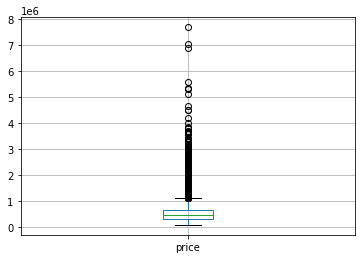

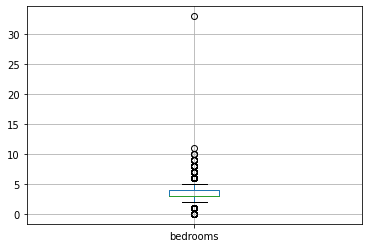

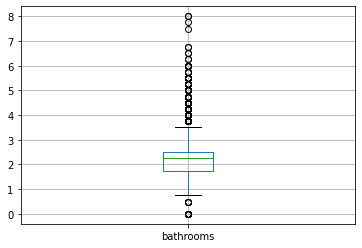

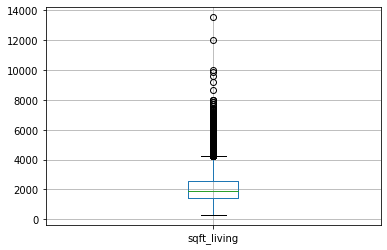

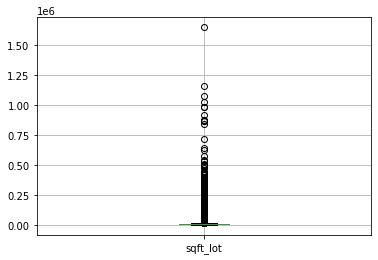

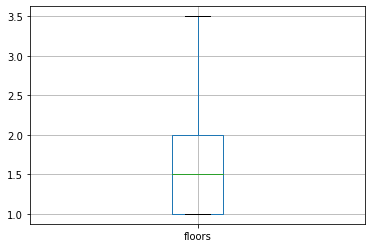

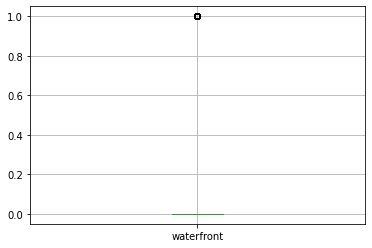

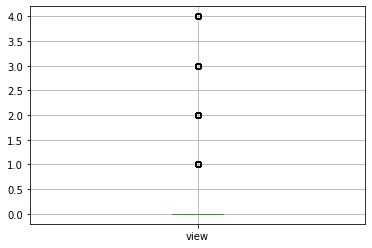

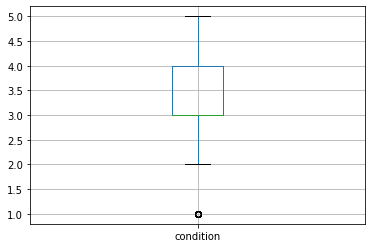

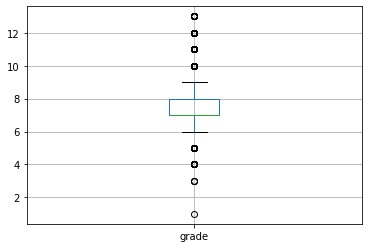

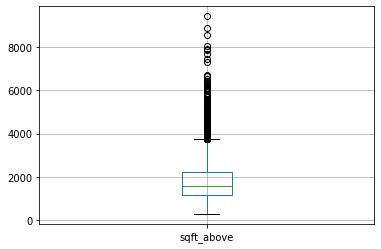

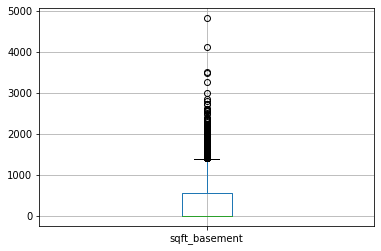

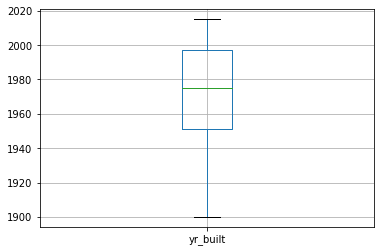

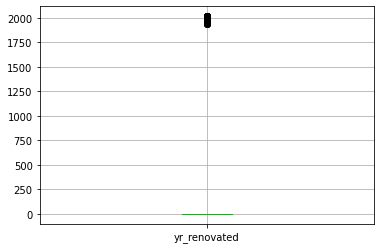

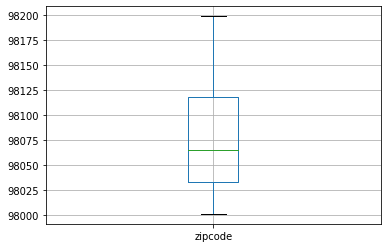

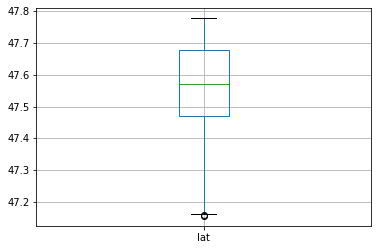

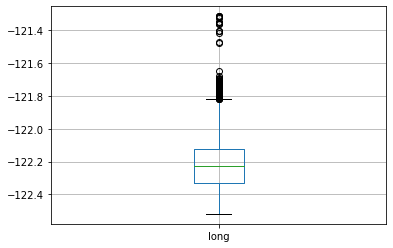

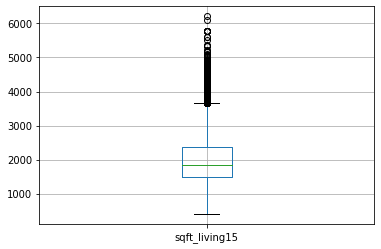

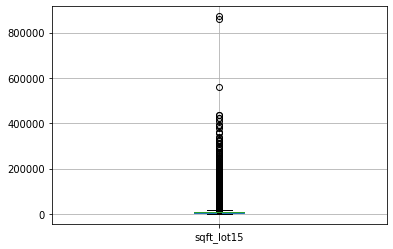

In [ ]:
for col in df.columns[1:]:
    plt.figure()
    df.boxplot([col])

## 1.f

In [4]:
from scipy.spatial.distance import euclidean, pdist, squareform

def similarity_func(u, v):
    return 1/(1+euclidean(u,v))
df_num = df[:10].drop(['date'], axis=1)
dists = pdist(df_num, similarity_func)
df_dist = pd.DataFrame(squareform(dists), columns=df_num.index, 
                       index=df_num.index)
df_dist

id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160
id,,,,,,,,,,
7129300520,0.000000e+00,0.000003,2.368433e-05,0.000003,0.000003,9.878305e-07,0.000028,0.000014,1.210369e-04,0.000010
6414100192,3.163330e-06,0.000000,2.793090e-06,0.000015,0.000036,1.428786e-06,0.000004,0.000004,3.241374e-06,0.000005
5631500400,2.368433e-05,0.000003,0.000000e+00,0.000002,0.000003,9.494457e-07,0.000013,0.000009,2.016489e-05,0.000007
2487200875,2.617088e-06,0.000015,2.358232e-06,0.000000,0.000011,1.572387e-06,0.000003,0.000003,2.670067e-06,0.000004
1954400510,3.470795e-06,0.000036,3.030203e-06,0.000011,0.000000,1.374928e-06,0.000004,0.000005,3.565011e-06,0.000005
7237550310,9.878305e-07,0.000001,9.494457e-07,0.000002,0.000001,0.000000e+00,0.000001,0.000001,9.956400e-07,0.000001
1321400060,2.804329e-05,0.000004,1.288838e-05,0.000003,0.000004,1.023730e-06,0.000000,0.000029,3.563788e-05,0.000015
2008000270,1.424760e-05,0.000004,8.938985e-06,0.000003,0.000005,1.061299e-06,0.000029,0.000000,1.602043e-05,0.000032
2414600126,1.210369e-04,0.000003,2.016489e-05,0.000003,0.000004,9.956400e-07,0.000036,0.000016,0.000000e+00,0.000011


## 1.g

In [ ]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


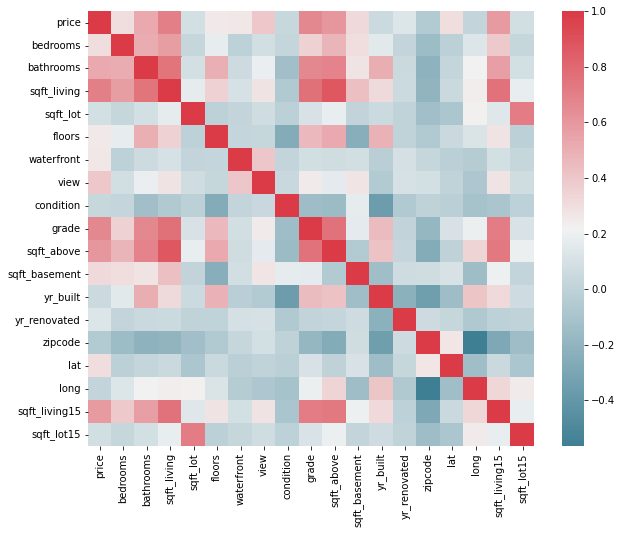

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

## 1.h

In [5]:
corr_abs = corr.abs()
up_tri = corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(np.bool))
col_corr = [column for column in up_tri.columns if any(up_tri[column] > 0.8)]
for col in col_corr:
    for feat in corr:
        if corr[col][feat] > 0.8 and corr[col][feat] < 1:
            print(f'*{col}* and *{feat}* are correlated!')

NameError: ignored

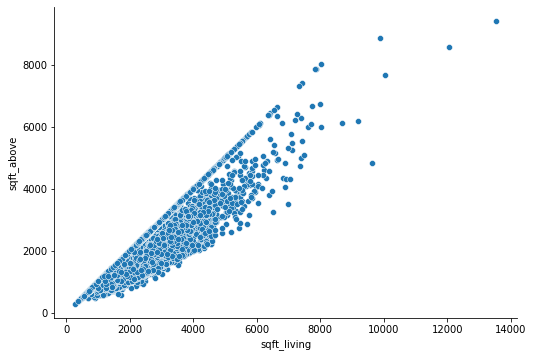

In [ ]:
sns.pairplot(df, height=5, aspect=1.5, y_vars=['sqft_above'], 
             x_vars=['sqft_living'])

## 2.a

In [6]:
# fixing the date format
df['date'] = pd.to_datetime(df['date'])

# find out if there is an incorrect date
pd.to_datetime(df['date'], errors='coerce').isnull().value_counts()

False    21613
Name: date, dtype: int64

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [7]:
# remove outliers

def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    clean = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return clean

df_clean = df.copy()
for col in df.columns:
    if col != 'date':
        df_clean = df[remove_outlier(df[col])]

n_outliers = len(df) - len(df_clean)
print(f'{n_outliers} outliers found!')
print(f'original data had {len(df)} rows\ncleaned data has {len(df_clean)} rows')

2194 outliers found!
original data had 21613 rows
cleaned data has 19419 rows


In [ ]:
for col in df_clean.columns:
    print(f'{df_clean[col].isnull().sum()} missing values in {col}')

0 missing values in date
0 missing values in price
0 missing values in bedrooms
0 missing values in bathrooms
0 missing values in sqft_living
0 missing values in sqft_lot
0 missing values in floors
0 missing values in waterfront
0 missing values in view
0 missing values in condition
0 missing values in grade
0 missing values in sqft_above
0 missing values in sqft_basement
0 missing values in yr_built
0 missing values in yr_renovated
0 missing values in zipcode
0 missing values in lat
0 missing values in long
0 missing values in sqft_living15
0 missing values in sqft_lot15


## 2.b

In [ ]:
# record redundancy
print(f'{len(df_clean.drop_duplicates()) - len(df_clean)} redundant rows')

# feature redundancy
print('\n*sqft_living15* and *sqft_lot15* can be removed')

0 redundant rows

*sqft_living15* and *sqft_lot15* can be removed


## 2.c

In [ ]:
print('no need to reduce data since there are no duplicates')

no need to reduce data since there are no duplicates


## 2.d

In [ ]:
df_norm = df_clean.copy()
for col in df_clean.columns:
    if col != 'date':
        df_norm[col] = (df_clean[col] - df_clean[col].mean()) / (df_clean[col].max() - df_clean[col].min())

In [ ]:
df_norm.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,-0.038870,-0.010705,-0.135125,-0.070291,-0.002245,-0.196076,-0.004635,-0.052462,-0.102297,-0.057459,-0.065052,-0.059662,-0.131822,-0.039537,0.490761,-0.082349,-0.024849,-0.112138,-0.094799
6414100192,2014-12-09,0.002602,-0.010705,0.021125,0.048716,-0.000878,0.203924,-0.004635,-0.052462,-0.102297,-0.057459,0.055680,0.023325,-0.166604,0.948552,0.223084,0.255113,-0.077038,-0.044440,0.022900
5631500400,2015-02-25,-0.044368,-0.041008,-0.135125,-0.105393,0.001491,-0.196076,-0.004635,-0.052462,-0.102297,-0.157459,-0.115052,-0.059662,-0.323126,-0.039537,-0.266815,0.282297,-0.004647,0.154786,0.047931
2487200875,2014-12-09,0.011261,0.019598,0.114875,-0.003510,-0.002804,-0.196076,-0.004635,-0.052462,0.397703,-0.057459,-0.080905,0.129134,-0.044865,-0.039537,0.278640,-0.066907,-0.139327,-0.108270,-0.133263
1954400510,2015-02-18,-0.001072,-0.010705,-0.010125,-0.027482,-0.000158,-0.196076,-0.004635,-0.052462,-0.102297,0.042541,-0.004076,-0.059662,0.146439,-0.039537,-0.034492,0.087508,0.153602,-0.023163,0.014852


## 2.e

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X = scaler.fit_transform(df_clean[[col for col in df.columns if col != 'date']])
pca = PCA()
X_r = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_

array([2.93742549e-01, 1.28992902e-01, 1.02089272e-01, 6.58036537e-02,
       5.52766859e-02, 5.30391753e-02, 4.82007239e-02, 4.34877115e-02,
       3.81836769e-02, 3.53176432e-02, 2.77813015e-02, 2.42189186e-02,
       2.18022221e-02, 1.50239834e-02, 1.44498759e-02, 1.28840840e-02,
       1.04011002e-02, 9.30452018e-03, 3.85742484e-33])

In [9]:
df=df.drop(['waterfront','view','yr_renovated','sqft_basement'],axis=1)

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


## k-means unsupervised

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [11]:
features =["bedrooms", "bathrooms","sqft_living" ,"sqft_lot" ,"floors" ,"condition","grade","sqft_above","yr_built","zipcode","lat","long","sqft_living15", "sqft_lot15"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
y_train

id
1931300850     427000.0
9536600810     380000.0
5470100270     225000.0
1644510040     681716.0
8079010220     440000.0
                ...    
3630110510     571000.0
6813600605    1350000.0
224069145      650000.0
520700125      437000.0
1762600320    1025000.0
Name: price, Length: 18371, dtype: float64

In [ ]:
#k-means whit 2 clusters
km = KMeans(n_clusters=2,init='k-means++', random_state=0)
y_predicted = km.fit(df.drop(['date', 'price',],axis=1))
y_predicted

KMeans(n_clusters=2, random_state=0)

In [ ]:
km.cluster_centers_

array([[ 3.37022038e+00,  2.10808297e+00,  2.06564574e+03,
         1.08526592e+04,  1.49272462e+00,  3.41170654e+00,
         7.64579017e+00,  1.77390766e+03,  1.97078584e+03,
         9.80785546e+04,  4.75614512e+01, -1.22217165e+02,
         1.97906772e+03,  1.00530023e+04],
       [ 3.40583554e+00,  2.49071618e+00,  2.88281167e+03,
         2.54747533e+05,  1.58355438e+00,  3.28116711e+00,
         8.28116711e+00,  2.60420424e+03,  1.98335809e+03,
         9.80433103e+04,  4.74812637e+01, -1.22029756e+02,
         2.40816180e+03,  1.65726992e+05]])

In [ ]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

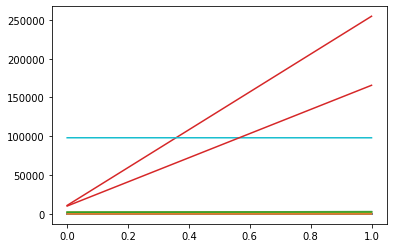

In [ ]:
plt.plot(km.cluster_centers_)

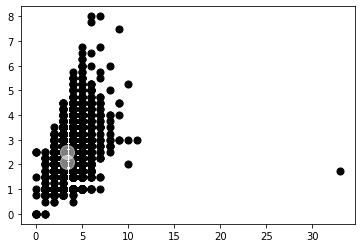

In [ ]:
c=df.drop(['date', 'price',],axis=1)
plt.scatter(c.iloc[:, 0], c.iloc[:, 1], s=50, c='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='white', s=200, alpha=0.5)
plt.savefig("clusterflop")

In [ ]:
df['price'].mean()

540088.1417665294

In [12]:
def cluster_vals (cost):
    if cost > 540088.1417665294:
        return 1
    else:
        return 0
df['Cluster']=df['price'].apply(cluster_vals)

In [ ]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Cluster
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("CONFUSION MATRIX:\n\n ",confusion_matrix(df['Cluster'],km.labels_))
print("\nCLASSIFICATION REPORT:\n\n",classification_report(df['Cluster'],km.labels_))

CONFUSION MATRIX:

  [[13533   161]
 [ 7703   216]]

CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.64      0.99      0.77     13694
           1       0.57      0.03      0.05      7919

    accuracy                           0.64     21613
   macro avg       0.61      0.51      0.41     21613
weighted avg       0.61      0.64      0.51     21613



In [ ]:
#k-means whit 4 clusters
km = KMeans(n_clusters=4,init='k-means++', random_state=0)
y_predicted = km.fit(df.drop(['date', 'price',],axis=1))
y_predicted

KMeans(n_clusters=4, random_state=0)

In [ ]:
km.cluster_centers_

array([[ 3.36186732e+00,  2.09074056e+00,  2.02647220e+03,
         8.24346608e+03,  1.49046932e+00,  3.41198427e+00,
         7.60349375e+00,  1.73527661e+03,  1.97028940e+03,
         9.80801131e+04,  4.75620774e+01, -1.22225240e+02,
         1.94399224e+03,  7.83800926e+03,  3.51415916e-01],
       [ 3.41100324e+00,  2.49838188e+00,  2.88752751e+03,
         2.44241155e+05,  1.58090615e+00,  3.26213592e+00,
         8.26537217e+00,  2.60097411e+03,  1.98364401e+03,
         9.80433463e+04,  4.74835178e+01, -1.22026055e+02,
         2.42468285e+03,  1.67862175e+05,  5.66343042e-01],
       [ 3.20000000e+00,  2.73333333e+00,  3.18426667e+03,
         9.21718533e+05,  1.73333333e+00,  3.33333333e+00,
         8.93333333e+00,  2.98826667e+03,  1.98206667e+03,
         9.80378000e+04,  4.74788467e+01, -1.22025733e+02,
         2.13133333e+03,  2.75858467e+05,  9.33333333e-01],
       [ 3.51337793e+00,  2.41137124e+00,  2.75498077e+03,
         5.98450092e+04,  1.53344482e+00,  3.40551839

In [ ]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

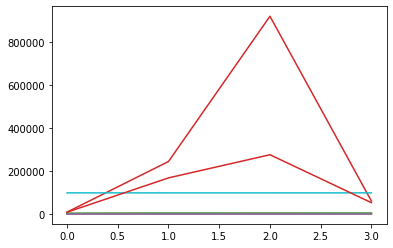

In [ ]:
plt.plot(km.cluster_centers_)

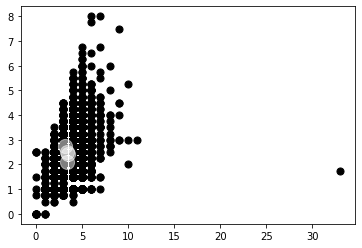

In [ ]:
c=df.drop(['date', 'price',],axis=1)
plt.scatter(c.iloc[:, 0], c.iloc[:, 1], s=50, c='black')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='white', s=200, alpha=0.5)
plt.savefig("clusterflop")

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("CONFUSION MATRIX:\n\n ",confusion_matrix(df['Cluster'],km.labels_))
print("\nCLASSIFICATION REPORT:\n\n",classification_report(df['Cluster'],km.labels_))

CONFUSION MATRIX:

  [[13031   134     1   528]
 [ 7061   175    14   669]
 [    0     0     0     0]
 [    0     0     0     0]]

CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.65      0.95      0.77     13694
           1       0.57      0.02      0.04      7919
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.61     21613
   macro avg       0.30      0.24      0.20     21613
weighted avg       0.62      0.61      0.50     21613



## k_means supervised

In [ ]:
features =["bedrooms", "bathrooms","sqft_living" ,"sqft_lot" ,"floors" ,"condition","grade","sqft_above","yr_built","zipcode","lat","long","sqft_living15", "sqft_lot15"]    
X = df[features]
Y = df['Cluster']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
#k-means whit 4 clusters
km = KMeans(n_clusters=4,init='k-means++', random_state=0)
y_predicted = km.fit(x_train,y_train)
y_predicted

KMeans(n_clusters=4, random_state=0)

In [ ]:
predictions = km.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.43      0.04      0.06      2057
           1       1.00      0.00      0.00      1185
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.02      3242
   macro avg       0.36      0.01      0.02      3242
weighted avg       0.64      0.02      0.04      3242



In [ ]:
#k-means whit 2 clusters
km = KMeans(n_clusters=2,init='k-means++', random_state=0)
y_predicted = km.fit(x_train,y_train)
y_predicted

KMeans(n_clusters=2, random_state=0)

In [ ]:
predictions = km.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.99      0.77      2057
           1       0.53      0.03      0.05      1185

    accuracy                           0.64      3242
   macro avg       0.58      0.51      0.41      3242
weighted avg       0.60      0.64      0.51      3242



## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

epsilon =1
min_samples = 60
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X_r)

In [ ]:
db.labels_ 

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
cluster_labels = pd.Series(db.labels_)
cluster_labels.value_counts()

-1    18555
 0      269
 2      189
 5      111
 3       83
 4       82
 1       70
 6       60
dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN

epsilon =1
min_samples = 60
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df.drop(['date', 'price',],axis=1))

In [ ]:
db.labels_ 

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("CONFUSION MATRIX:\n\n ",confusion_matrix(df['Cluster'],db.labels_))
print("\nCLASSIFICATION REPORT:\n\n",classification_report(df['Cluster'],db.labels_))

CONFUSION MATRIX:

  [[    0     0     0]
 [13694     0     0]
 [ 7919     0     0]]

CLASSIFICATION REPORT:

               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00   13694.0
           1       0.00      0.00      0.00    7919.0

    accuracy                           0.00   21613.0
   macro avg       0.00      0.00      0.00   21613.0
weighted avg       0.00      0.00      0.00   21613.0



In [ ]:
features =["bedrooms", "bathrooms","sqft_living" ,"sqft_lot" ,"floors" ,"condition","grade","sqft_above","yr_built","zipcode","lat","long","sqft_living15", "sqft_lot15"]    
X = df[features]
Y = df['Cluster']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
from sklearn.cluster import DBSCAN

epsilon =1
min_samples = 60
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(x_train,y_train)

In [ ]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
cluster_labels = pd.Series(db.labels_)
cluster_labels.value_counts()

-1    18371
dtype: int64

In [ ]:
db.labels_[:3242].shape

(3242,)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("CONFUSION MATRIX:\n\n ",confusion_matrix(y_test,db.labels_[:3242]))
print("\nCLASSIFICATION REPORT:\n\n",classification_report(y_test,db.labels_[:3242]))

CONFUSION MATRIX:

  [[   0    0    0]
 [2057    0    0]
 [1185    0    0]]

CLASSIFICATION REPORT:

               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00    2057.0
           1       0.00      0.00      0.00    1185.0

    accuracy                           0.00    3242.0
   macro avg       0.00      0.00      0.00    3242.0
weighted avg       0.00      0.00      0.00    3242.0



## SVM

In [13]:
features =["bedrooms", "bathrooms","sqft_living" ,"sqft_lot" ,"floors" ,"condition","grade","sqft_above","yr_built","zipcode","lat","long","sqft_living15", "sqft_lot15"]
X = df[features]
y = df['Cluster']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4],'probability':[True]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf'], 'probability': [True]})

In [ ]:
svmclf = clf.best_estimator_
svmclf.fit(x_train, y_train)

SVC(C=1, gamma=0.0001, probability=True)

In [ ]:
y_testSVM = svmclf.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_testSVM))
print("Accuracy: {0}".format(accuracy_score(y_test, y_testSVM)))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      2057
           1       0.60      0.01      0.01      1185

    accuracy                           0.64      3242
   macro avg       0.62      0.50      0.40      3242
weighted avg       0.62      0.64      0.50      3242

Accuracy: 0.6354102405922271


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": [1, 5, 10, 30],
              "weights": ['uniform', 'distance'],
              "metric": ['minkowski','euclidean','manhattan'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
kclf = kgclf.best_estimator_
kclf.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights='distance')

In [ ]:
y_testKNN = kclf.predict(x_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print(classification_report(y_test, y_testKNN))
print("Accuracy: {0}".format(accuracy_score(y_test, y_testKNN)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      2057
           1       0.76      0.63      0.69      1185

    accuracy                           0.79      3242
   macro avg       0.78      0.76      0.77      3242
weighted avg       0.79      0.79      0.79      3242

Accuracy: 0.7930289944478717


## NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1843  214]
 [ 539  646]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2057
           1       0.75      0.55      0.63      1185

    accuracy                           0.77      3242
   macro avg       0.76      0.72      0.73      3242
weighted avg       0.77      0.77      0.76      3242



In [ ]:
model.score(x_test,y_test)

0.7677359654534238

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=None,var_smoothing=1)
model.fit(x_train, y_train )

GaussianNB(var_smoothing=1)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2019   38]
 [1144   41]]
              precision    recall  f1-score   support

           0       0.64      0.98      0.77      2057
           1       0.52      0.03      0.06      1185

    accuracy                           0.64      3242
   macro avg       0.58      0.51      0.42      3242
weighted avg       0.59      0.64      0.51      3242



## DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(x_train,y_train)


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1835  222]
 [ 203  982]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2057
           1       0.82      0.83      0.82      1185

    accuracy                           0.87      3242
   macro avg       0.86      0.86      0.86      3242
weighted avg       0.87      0.87      0.87      3242



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0,splitter='best')

clf = clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1786  271]
 [ 240  945]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2057
           1       0.78      0.80      0.79      1185

    accuracy                           0.84      3242
   macro avg       0.83      0.83      0.83      3242
weighted avg       0.84      0.84      0.84      3242



In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0,splitter='random')

clf = clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1628  429]
 [ 363  822]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2057
           1       0.66      0.69      0.67      1185

    accuracy                           0.76      3242
   macro avg       0.74      0.74      0.74      3242
weighted avg       0.76      0.76      0.76      3242



## ensemble

In [16]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

clf= clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
clf.score(x_test,y_test)

0.7444181716639591

## bagging

In [26]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [29]:
base_cls = DecisionTreeClassifier()
# no. of base classifier
num_trees = 500
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          ).fit(x_train,y_train)
  
results = model_selection.cross_val_score(model, x_test,y_test)
print("accuracy :")
print(results.mean())

accuracy :
0.9046881241796496


## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(2,),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [ ]:
clf.fit(x_train,y_train)

Iteration 1, loss = 2.81171933
Iteration 2, loss = 0.69970890
Iteration 3, loss = 0.66705122
Iteration 4, loss = 0.65907255
Iteration 5, loss = 0.65706344
Iteration 6, loss = 0.65701755
Iteration 7, loss = 0.65703631
Iteration 8, loss = 0.65703417
Iteration 9, loss = 0.65706129
Iteration 10, loss = 0.65705054
Iteration 11, loss = 0.65711018
Iteration 12, loss = 0.65703775
Iteration 13, loss = 0.65707936
Iteration 14, loss = 0.65710225
Iteration 15, loss = 0.65702881
Iteration 16, loss = 0.65709041
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(2,), learning_rate_init=0.01, random_state=5,
              verbose=True)

In [ ]:
ypred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.634484885872918

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))

[[2057    0]
 [1185    0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78      2057
           1       0.00      0.00      0.00      1185

    accuracy                           0.63      3242
   macro avg       0.32      0.50      0.39      3242
weighted avg       0.40      0.63      0.49      3242



## MLP+KNN

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='categorical_crossentropy')

In [ ]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=200)

Epoch 1/200
575/575 [==============================] - 2s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 2/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 3/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 4/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 5/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 6/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 7/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 8/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 9/200
575/575 [==============================] - 1s 2ms/step - loss: 4.3697e-08 - val_loss: 4.3573e-08
Epoch 10/200
575/57

In [ ]:
predictions = model.predict(x_test)

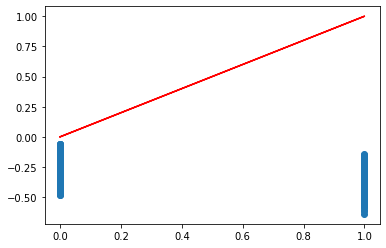

In [ ]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [ ]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.layers.core.dense.Dense object at 0x7fa75da6da10>
1 <keras.layers.core.dense.Dense object at 0x7fa75da50b10>
2 <keras.layers.core.dense.Dense object at 0x7fa7c5b37250>


In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(18371, 14) (3242, 14) (18371,) (3242,)


In [ ]:
from keras import backend as K

f = K.function([model.layers[0].input],
                                  [model.layers[2].output])


In [ ]:
exTrain = f([x_train[:18000]])[0]

In [ ]:
exTest = f([x_train[:3000]])[0]

In [ ]:
exTrain[0]

array([-0.22573474], dtype=float32)

In [ ]:
exTest.shape

(3000, 1)

In [ ]:
Y_train = y_train[:18000]
Y_test = y_test[:3000]

In [ ]:
print(exTrain.shape, exTest.shape, Y_train.shape, Y_test.shape)

(18000, 1) (3000, 1) (18000,) (3000,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": [1, 5, 10, 30],
              "weights": ['uniform', 'distance'],
              "metric": ['minkowski','euclidean','manhattan'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(exTrain, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
kclf = kgclf.best_estimator_
kclf.fit(exTrain, Y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_testKNN = kclf.predict(exTest)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#print_cmx(y_test1000.T[0], y_testKNN)
print(classification_report(Y_test, y_testKNN))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testKNN)))

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1897
           1       0.35      0.18      0.23      1103

    accuracy                           0.58      3000
   macro avg       0.49      0.49      0.47      3000
weighted avg       0.53      0.58      0.53      3000

Accuracy: 0.5756666666666667


## MLP+SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4],'probability':[True]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(exTrain, Y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf'], 'probability': [True]})

In [ ]:
svmclf = clf.best_estimator_
svmclf.fit(exTrain, Y_train)

SVC(C=1000, gamma=0.0001, probability=True)

In [ ]:
y_testSVM = svmclf.predict(exTest)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(Y_test, y_testSVM))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testSVM)))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68      1897
           1       0.34      0.22      0.27      1103

    accuracy                           0.56      3000
   macro avg       0.48      0.49      0.48      3000
weighted avg       0.52      0.56      0.53      3000

Accuracy: 0.5576666666666666


In [ ]:
!pip install apyori  

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=aba46c8f93fd75da0e4c76e872770531a4c3f0d4142345cde84924f1f99cdc01
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [ ]:
#Importing the dataset  
dataset = pd.read_csv('house_sales_prediction.csv')  
transactions=[]  
for i in range(0, 7501):  
    transactions.append([str(dataset.values[i,j])  for j in range(0,20)])  

In [ ]:
from apyori import apriori  
rules= apriori(transactions= transactions, min_support=0.003, min_confidence = 0.2, min_lift=3, min_length=2, max_length=2)  

In [ ]:
results= list(rules)  
results   

[RelationRecord(items=frozenset({'1.5', '1926'}), support=0.004932675643247567, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1926'}), items_add=frozenset({'1.5'}), confidence=0.5068493150684932, lift=3.2439221094955353)]),
 RelationRecord(items=frozenset({'1927', '1.5'}), support=0.003199573390214638, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1927'}), items_add=frozenset({'1.5'}), confidence=0.5853658536585367, lift=3.7464413551985354)]),
 RelationRecord(items=frozenset({'1.5', '1928'}), support=0.0035995200639914677, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1928'}), items_add=frozenset({'1.5'}), confidence=0.6136363636363636, lift=3.927377443375737)]),
 RelationRecord(items=frozenset({'1.5', '1929'}), support=0.003199573390214638, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1929'}), items_add=frozenset({'1.5'}), confidence=0.6315789473684211, lift=4.042213041135262)]),
 RelationRecord(items=frozenset({'10', '3.25'}), 

In [ ]:
for item in results:  
    pair = item[0]   
    items = [x for x in pair]  
    print("Rule: " + items[0] + " -> " + items[1])  
  
    print("Support: " + str(item[1]))  
    print("Confidence: " + str(item[2][0][2]))  
    print("Lift: " + str(item[2][0][3]))  
    print("=====================================")  

Rule: 1.5 -> 1926
Support: 0.004932675643247567
Confidence: 0.5068493150684932
Lift: 3.2439221094955353
Rule: 1927 -> 1.5
Support: 0.003199573390214638
Confidence: 0.5853658536585367
Lift: 3.7464413551985354
Rule: 1.5 -> 1928
Support: 0.0035995200639914677
Confidence: 0.6136363636363636
Lift: 3.927377443375737
Rule: 1.5 -> 1929
Support: 0.003199573390214638
Confidence: 0.6315789473684211
Lift: 4.042213041135262
Rule: 10 -> 3.25
Support: 0.005065991201173177
Confidence: 0.22352941176470587
Lift: 4.519391152687489
Rule: 3.5 -> 10
Support: 0.006532462338354886
Confidence: 0.2300469483568075
Lift: 4.651164850739658
Rule: 98040 -> 10
Support: 0.003332888948140248
Confidence: 0.2272727272727273
Lift: 4.595074736584171
Rule: 10 -> 98075
Support: 0.005732568990801226
Confidence: 0.3071428571428571
Lift: 6.209915286869464
Rule: 3.5 -> 11
Support: 0.0041327822956939075
Confidence: 0.21985815602836878
Lift: 7.74251656511171
Rule: 1942 -> 6
Support: 0.006399146780429276
Confidence: 0.5517241379310